## Importing Relevent Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
import eli5
from eli5.sklearn import PermutationImportance
import shap
from pdpbox import pdp, info_plots
np.random.seed(123) #ensures reproducability

E:\Anaconda2020.2\setup\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
E:\Anaconda2020.2\setup\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


## Loading the Data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Columns:

- age: patient's age in years
- sex: 1=male, 0=female
- cp: chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic)
- trestbps: resting blood pressur(in mm Hg on admission to the hospital)
- chol: cholesterol measurement in mg/dl
- fbs: (fasting blood sugar > 120 ml/dl) 1=true, 0=false
- restecg: resting electrocardiographic results(0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left     ventricular hypertrophy by Estes' criteria)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1=yes, 0=no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slop of the peak exercise ST segment (0=upsloping, 1=flat, 2=downsloping)
- ca: number of major vessels (0-3) colored by flourosopy
- thal: a blood disorder called thalassemia (3=normal, 6=fixed defect, 7=reversable defect)
- target: have disease or not (1=yes, 0=no)

## Data Exploration

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

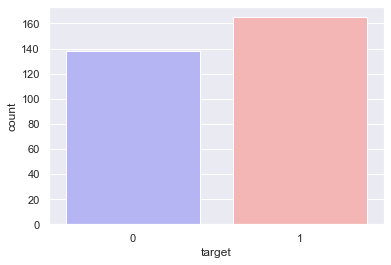

In [5]:
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [6]:
with_heart_disease = len(df[df.target == 1])
without_heart_disease = len(df[df.target == 0])
print('Percentage of patients with heart disease : {:.2f}%'.format((with_heart_disease / len(df.target)) * 100))
print('Percentage of patients with no heart disease : {:.2f}%'.format((without_heart_disease / len(df.target)) * 100))

Percentage of patients with heart disease : 54.46%
Percentage of patients with no heart disease : 45.54%


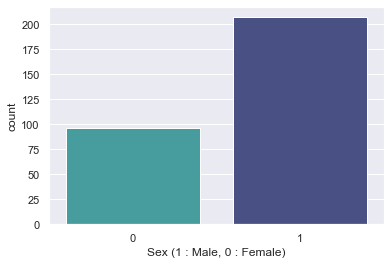

In [7]:
sns.countplot(x='sex', data=df, palette='mako_r')
plt.xlabel('Sex (1 : Male, 0 : Female)')
plt.show()

In [8]:
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])
print('Percentage of female patients : {:.2f}%'.format((count_female / len(df.sex)) * 100))
print('Percentage of male patients : {:.2f}%'.format((count_male / len(df.sex)) * 100))

Percentage of female patients : 31.68%
Percentage of male patients : 68.32%


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


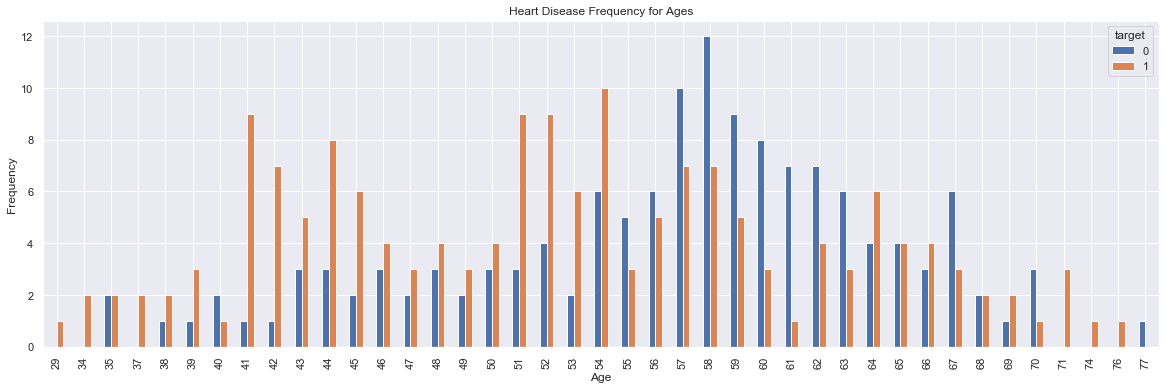

In [10]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('HeartDiseaseAndAge.png')
plt.show()

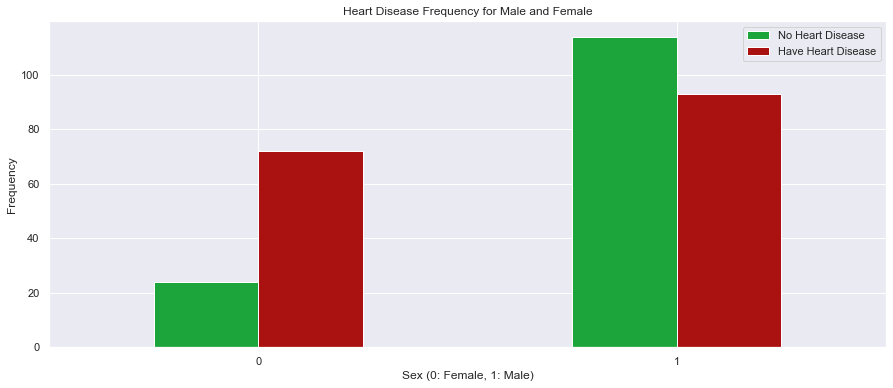

In [11]:
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15, 6), color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Male and Female')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['No Heart Disease', 'Have Heart Disease'])
plt.savefig('HeartDiseaseAndSex.png')
plt.show()

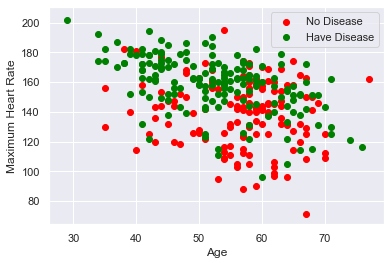

In [12]:
plt.scatter(x=df.age[df.target == 0], y=df.thalach[df.target == 0], color='red')
plt.scatter(x=df.age[df.target == 1], y=df.thalach[df.target == 1], color='green')
plt.legend(['No Disease', 'Have Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

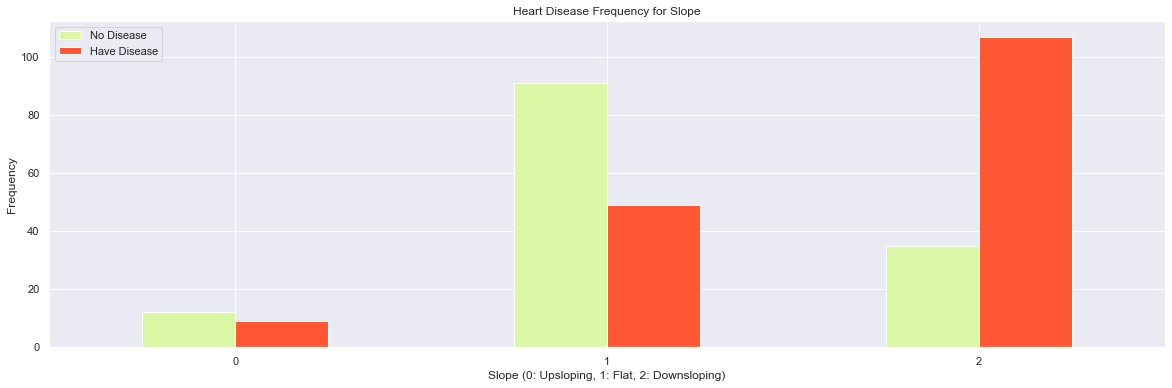

In [13]:
pd.crosstab(df.slope, df.target).plot(kind='bar', figsize=(20, 6), color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('Slope (0: Upsloping, 1: Flat, 2: Downsloping)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['No Disease', 'Have Disease'])
plt.savefig('HeartDiseaseAndSlope.png')
plt.show()

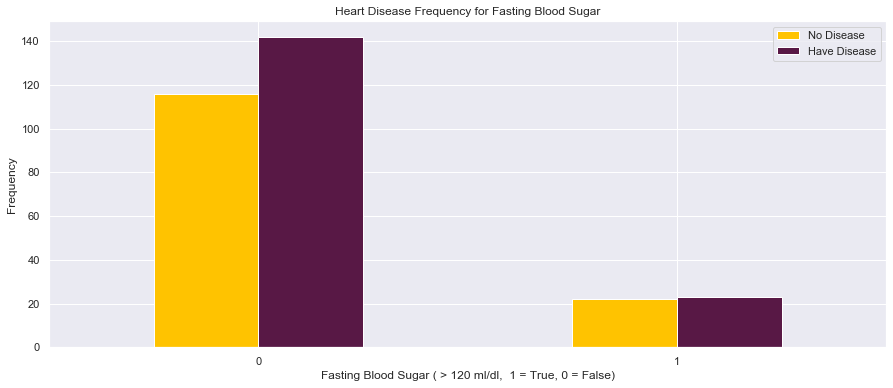

In [14]:
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(15, 6), color=['#FFC300','#581845'])
plt.title('Heart Disease Frequency for Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar ( > 120 ml/dl,  1 = True, 0 = False)')
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Have Disease'])
plt.ylabel('Frequency')
plt.savefig('HeartDiseaseAndFBS.png')
plt.show()

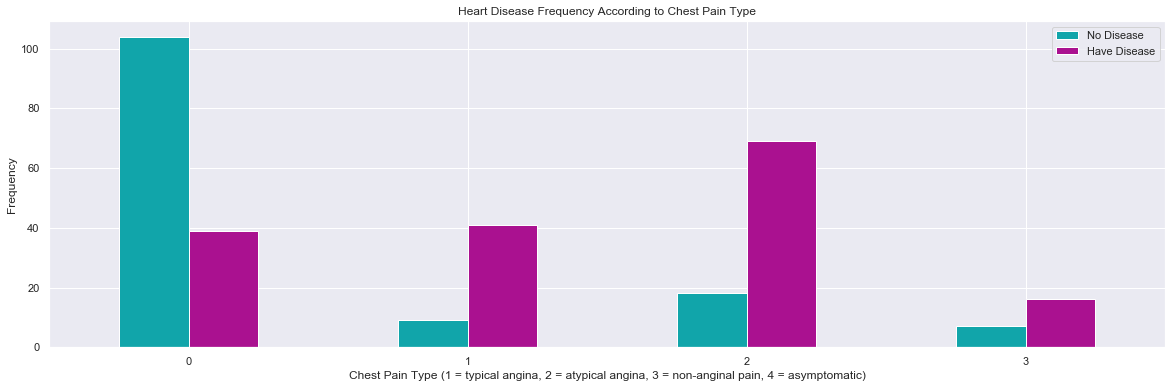

In [15]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(20, 6), color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.legend(['No Disease', 'Have Disease'])
plt.xlabel('Chest Pain Type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.savefig('HeartDiseaseAndCP.png')
plt.show()

## Creating Dummy Variables

In [16]:
a = pd.get_dummies(df['cp'], prefix='cp')
b = pd.get_dummies(df['thal'], prefix='thal')
c = pd.get_dummies(df['slope'], prefix='slope')

In [17]:
frames = [df, a, b, c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [18]:
df = df.drop(columns=['cp', 'thal', 'slope'])

## Creating a Logistic Regression Model

In [19]:
y = df.target.values
x_data = df.drop(['target'], axis=1)

### First Approach:

#### Normalize

In [20]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Transpose Matrices

In [22]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [23]:
def initialize(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

In [24]:
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [25]:
def forwardBackward(weight, bias, x_train, y_train):
    #forward
    y_head = sigmoid(np.dot(weight.T, x_train) + bias)
    loss = -(y_train * np.log(y_head)) + (1 - y_train) * (np.log(1 - y_head))
    cost = np.sum(loss) / x_train.shape[1]
    #backward
    derivative_weight = np.dot(x_train, ((y_head - y_train).T)) / x_train.shape[1]
    derivative_bias = np.sum((y_head - y_train).T) / x_train.shape[1]
    gradients = {'Derivative Weight': derivative_weight, 'Derivative Bias': derivative_bias}
    
    return cost, gradients

In [26]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    # for each iteration update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [27]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [28]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: -0.009978192046849651


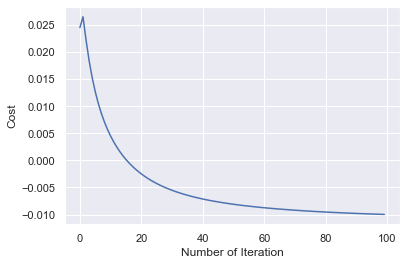

Manuel Test Accuracy: 86.89%


In [29]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

### Second Approach:

#### Sklearn Logistic Regression

In [30]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.89%


### Third Approach:

#### K-Nearest Neighbour (KNN) Classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 77.05%


#### Finding the Best K Value

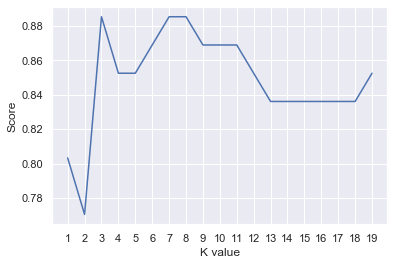

Maximum KNN Score is 88.52%


In [32]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

### Fourth Approach:

#### Support Vector Machine (SVM) Algorithm

In [33]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.52%


### Fifth Approach:

#### Naive Bayes Algorithm

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


### Sixth Approach:

#### Decision Tree Algorithm

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 78.69%


In [36]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['sex',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'ca',
 'target',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'thal_0',
 'thal_1',
 'thal_2',
 'thal_3',
 'slope_0',
 'slope_1',
 'slope_2']

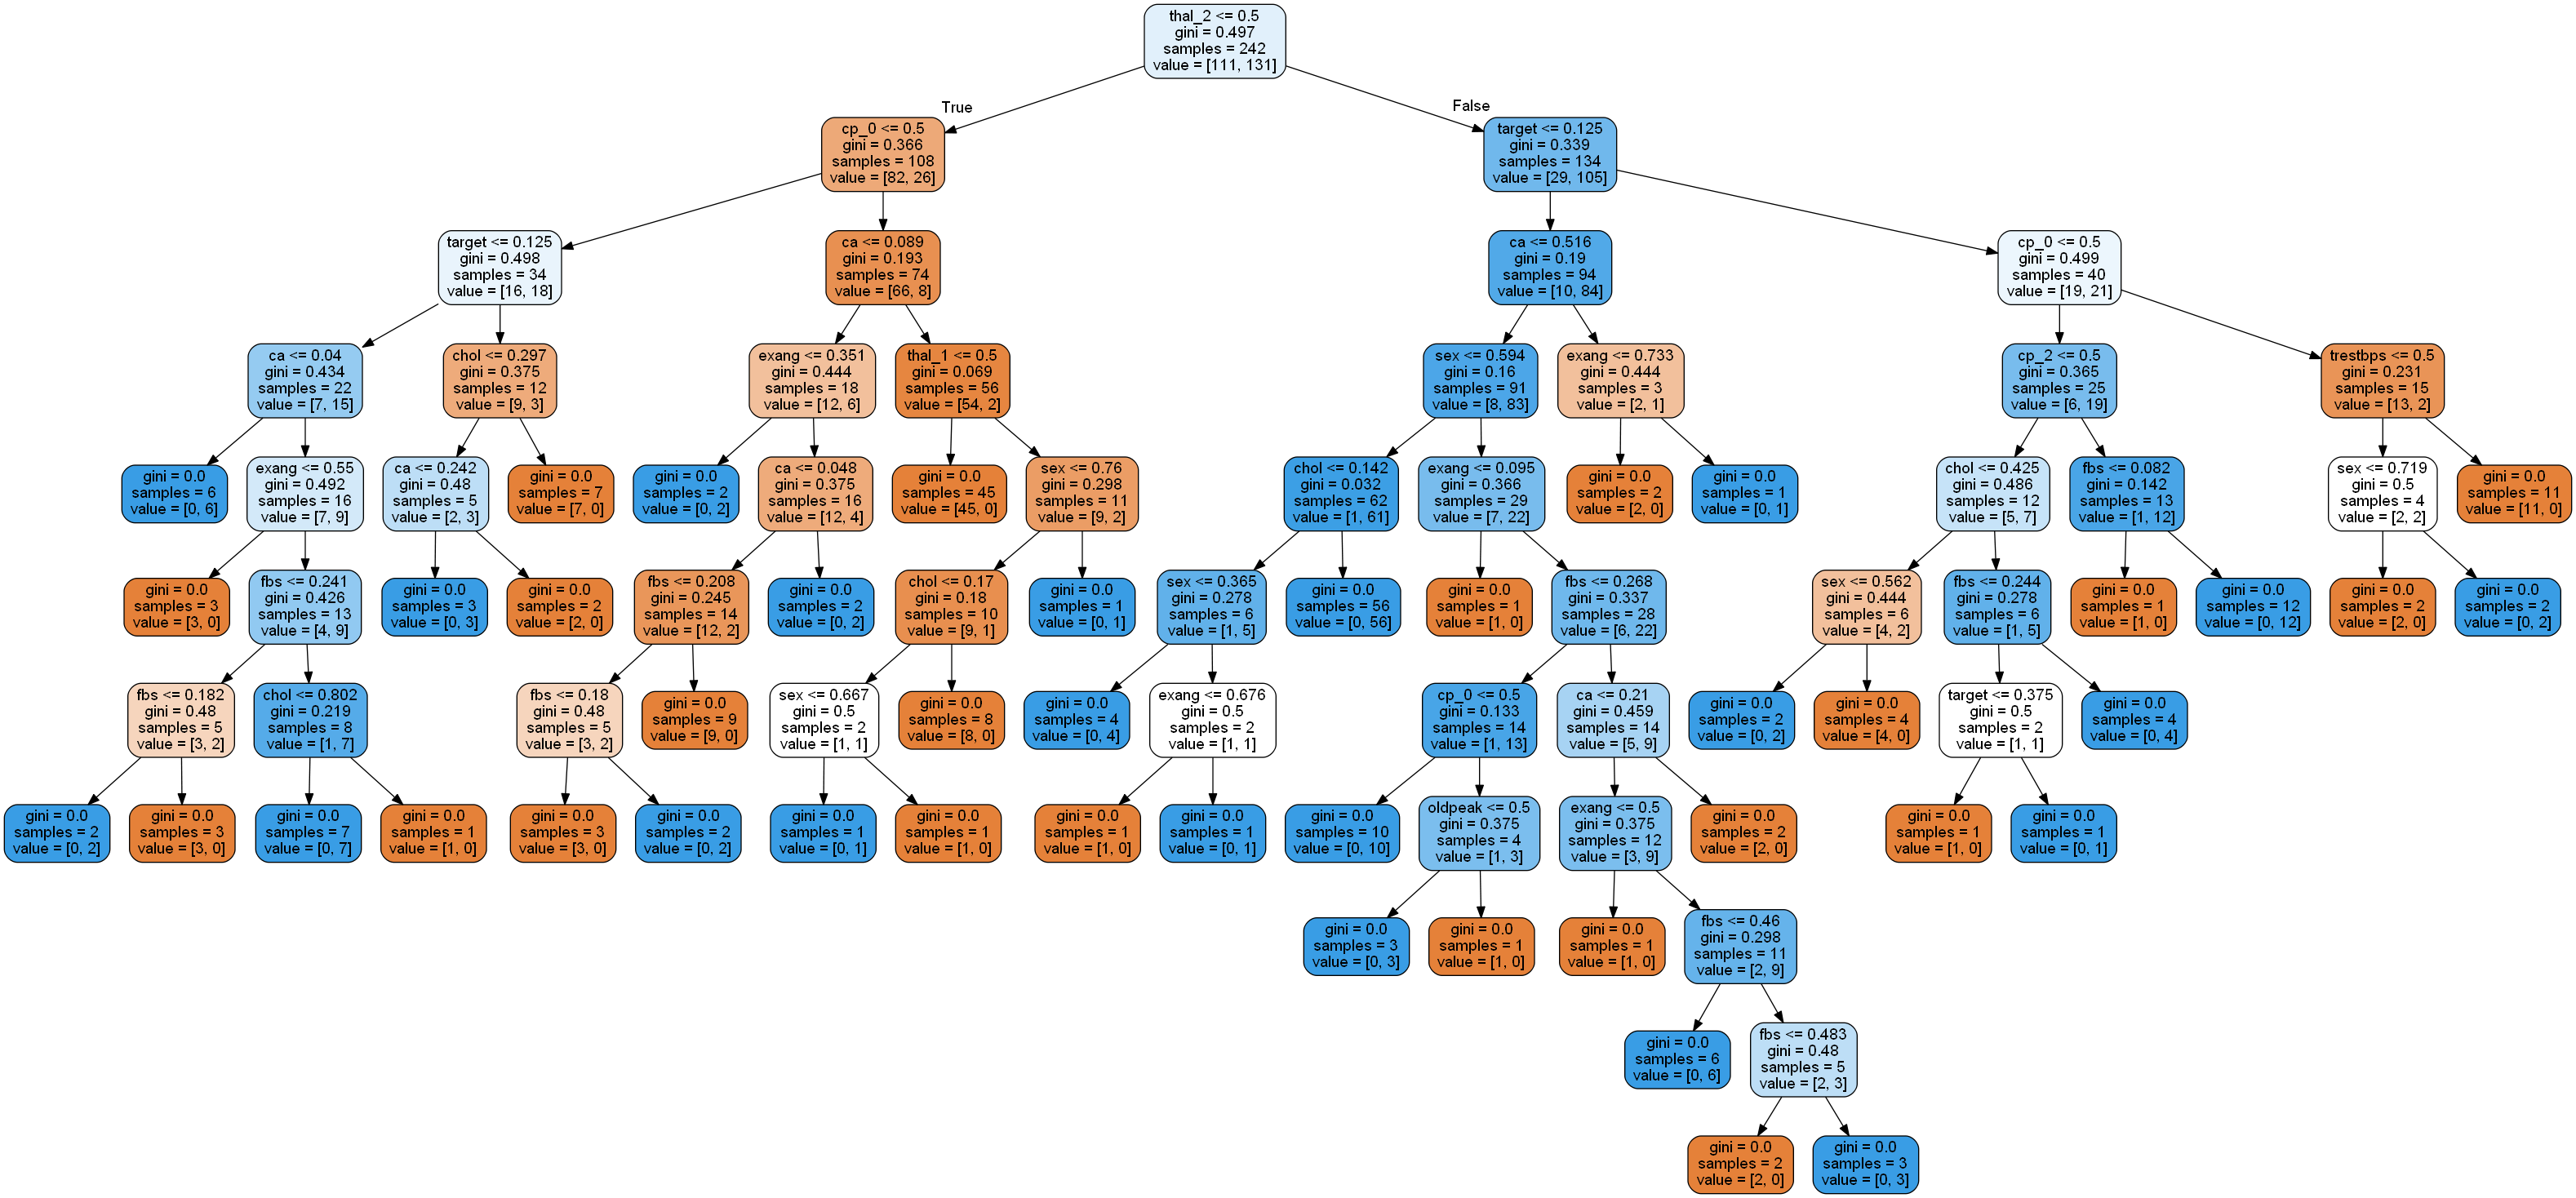

In [37]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

### Seventh Approach:

#### Random Forest Classification

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=5)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 90.16%


## Comparing Models

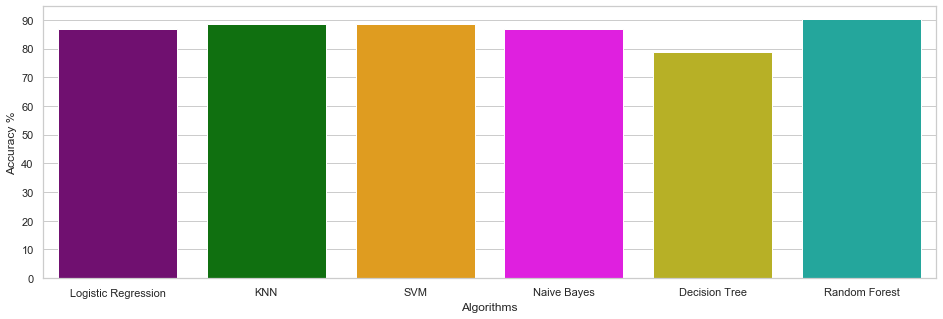

In [39]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion Matrix

In [53]:
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [54]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

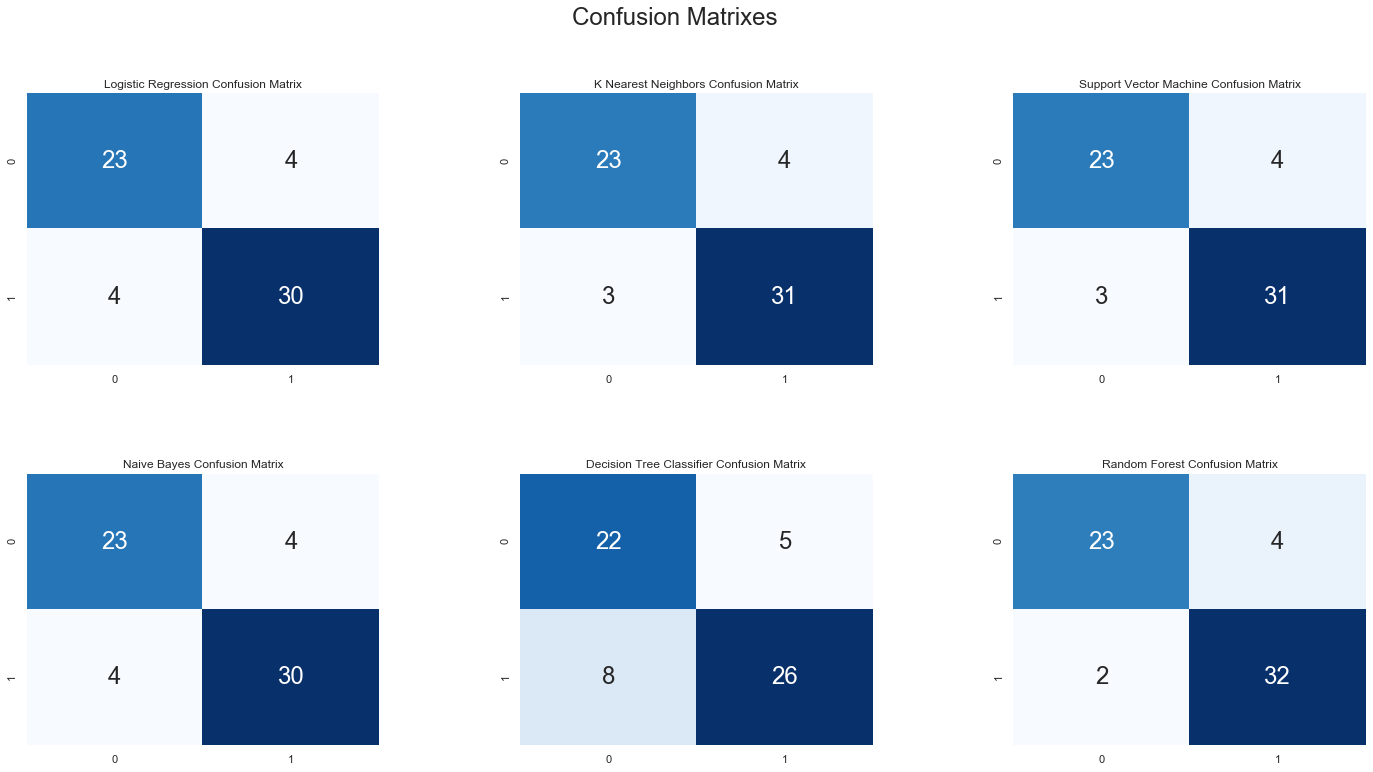

In [55]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()
